# Import packages for project

In [2]:
import pandas as pd
import json
from collections import defaultdict
import matplotlib.pyplot as plt

In [3]:
# Open File
with open('../data/world_bank_projects.json') as file:
    df = pd.read_json(file)

# 1. Find the 10 countries with most projects

List of top 10 countries.

In [4]:
top10countries = df.countryname.value_counts(dropna= False)[:10]
df['countryname'].value_counts(dropna= False)[:10]

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
People's Republic of Bangladesh    12
Nepal                              12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64

Visualization of top 10 countries

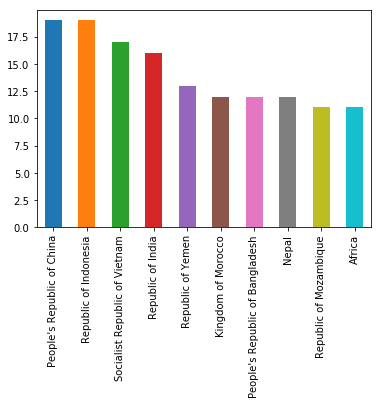

In [5]:
df['countryname'].value_counts()[:10].plot(kind = 'bar')

# 2. Find the top 10 major project themes (using column 'mjtheme_namecode')

In [6]:
df.mjtheme_namecode.value_counts(dropna = False)[:10]

[{'code': '11', 'name': 'Environment and natural resources management'}, {'code': '11', 'name': 'Environment and natural resources management'}]                                                                                12
[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}]                                                                                                                                                        11
[{'code': '8', 'name': 'Human development'}, {'code': '8', 'name': 'Human development'}]                                                                                                                                         8
[{'code': '4', 'name': 'Financial and private sector development'}, {'code': '4', 'name': 'Financial and private sector development'}]                                                                                           6
[{'code': '2', 'name': 'Public sector governance'}, {'code': '2', 'name': 'Public sector gov

Each project seems to have multiple major themes. However, this is not easily readable. Instead, I assumed that the combination of project themes does not matter and compile a huge list of all the themes mentioned. From there, I ran a frequency count to see what were the 10 major project themes. Below is the list of the 10 major project themes.

In [7]:
# Compile huge list of mj theme names and codes
themes = df['mjtheme_namecode']
mjtheme = []
for row in themes:
    for theme in row:
        mjtheme.append(theme)

mjtheme = pd.DataFrame(mjtheme)
mjtheme.name.value_counts(dropna = False)[:10]

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64

Visualization of the 10 major theme projects

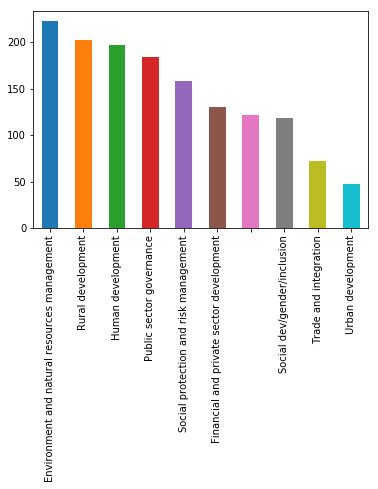

In [8]:
mjtheme['name'].value_counts()[:10].plot(kind = 'bar')

## 3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [9]:
# Creating Lookup Dictionary
themes = pd.DataFrame(df[['mjtheme', 'mjthemecode']])
themes = themes.dropna()
lookup = defaultdict()

for index, values in themes.iterrows():
    i = 0
    codes = values['mjthemecode'].split(sep=',')
    for theme in values['mjtheme']:
        code = codes[i]
        lookup[code] = lookup.get(code, theme)
        i += 1

In [10]:
# Filling in missing names
i = 0
for row in df['mjtheme_namecode']:
    r = 0
    for item in row:
        if item['name'] == '':
            df['mjtheme_namecode'][i][r]['name'] = lookup[item['code']]
        r += 1
    i += 1

Below is the updated top 10 major project themes.

In [11]:
themes = df['mjtheme_namecode']
mjtheme = []
for row in themes:
    for theme in row:
        mjtheme.append(theme)

mjtheme = pd.DataFrame(mjtheme)
mjtheme.name.value_counts(dropna = False)[:10]

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name, dtype: int64

Visualization of the frequency table

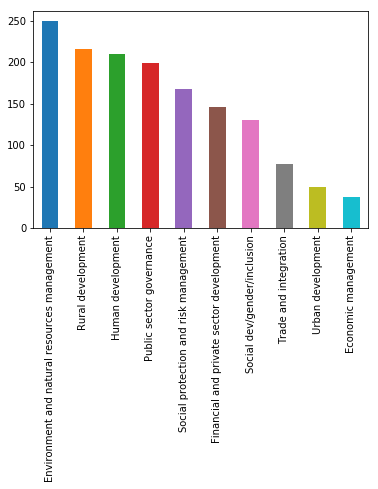

In [12]:
mjtheme['name'].value_counts()[:10].plot(kind = 'bar')